## OpenPlaning Examples
These are examples that you can find in the FAST '21 paper. It uses the [OpenPlaning](https://github.com/elcf/python-openplaning) package.

### Note
If you launched this notebook via Binder, please note that while this is a fully functioning JupyterLab and you are able to change any variable or function—however, **none of the changes you make will be saved**. If you want to keep the modifications you made, please download the modified files to your own computer by clicking File > Download while your file is active.

In [1]:
from openplaning import PlaningBoat

### Example 1 (Savitsky '76)

In [2]:
#Vessel particulars
speed = 13.07 #m/s
weight = 827400 #N
beam = 7.315 #m
length = 24.38 #m, vessel LOA
lcg = 10.67 #m, long. center of gravity
vcg = beam/7 #m, vert. center of gravity
r_g = 0.25*length #m, radius of gyration
beta = 15 #deg, deadrise

#Propulsion
epsilon = 0 #deg, thrust angle w.r.t. keel
vT = vcg #m, thrust vertical distance
lT = lcg #m, thrust horizontal distance

#Trim tab particulars
sigma = 1.0 #flap span-hull beam ratio
delta = 5 #deg, flap deflection
Lf = 0.3048 #m, flap chord

#Seaway
H_sig = 1.402 #m, significant wave height

#Create boat object
boat_1 = PlaningBoat(speed, weight, beam, lcg, vcg, r_g, beta, epsilon, vT, lT, length, H_sig, Lf=Lf, sigma=sigma, delta=delta, wetted_lengths_type=3)

#Calculates the equilibrium trim and heave,
#and updates boat.tau and boat.z_wl
boat_1.get_steady_trim()

boat_1.print_description()

---VESSEL---
Speed            13.07 m/s
V_k              25.40808 knot
Fn (beam)        1.543154 
Fn (volume)      2.001392 

Weight           827400 N
Mass             84371.75 kg
Volume           82.24409 m³
Beam             7.315 m
LCG              10.67 m from stern
VCG              1.045 m from keel
R_g              6.095 m
Deadrise         15 deg

LOA              24.38 m
AHR              0.00015 m, average hull roughness

---ATTITUDE---
z_wl             0.1384811 m, vertical distance of center of gravity to the calm water line
tau              2.878945 deg, trim angle
η₃               0 deg, additional heave
η₅               0 deg, additional trim
Transom draft    1.441111 m, draft of keel at transom

---PROPULSION---
Thrust angle     0 deg w.r.t. keel (CCW with body-fixed origin at 9 o'clock)
LCT              10.67 m from stern, positive forward
VCT              1.045 m from keel, positive up

---FLAP---
Chord            0.3048 m
Span/Beam        1 
Angle            5 deg w.r.t

a:\users\esteban\crownhydro\onedrive - crown hydrodynamics llc\projects\elcastro\software\python-openplaning\src\openplaning.py:138: UserWarning: The estimated wetted chine length (28.693) is larger than the vessel length (24.380).
  self.get_geo_lengths()
a:\users\esteban\crownhydro\onedrive - crown hydrodynamics llc\projects\elcastro\software\python-openplaning\src\openplaning.py:573: UserWarning: Beam-based Froude number Fn_B = 1.543 out of bounds (2-7) for flap forces estimates with Savitsky & Brown 1976
  get_flap_force()
a:\users\esteban\crownhydro\onedrive - crown hydrodynamics llc\projects\elcastro\software\python-openplaning\src\openplaning.py:379: UserWarning: The estimated wetted chine length (28.693-0.000j) is larger than the vessel length (24.380).
  self.get_geo_lengths() #Calculated wetted lengths in get_forces()
a:\users\esteban\crownhydro\onedrive - crown hydrodynamics llc\projects\elcastro\software\python-openplaning\src\openplaning.py:379: UserWarning: The estimated 

### Case Study

The variables are the lcg (constrained to 0.3L -- 0.5L), beta (constrained to 10deg -- 30 deg), and delta (constrained to 0deg -- 15deg). The particulars are similar to those of the RB-M

In [61]:
# Particulars
speed = 15 #m/s
weight = 162000 #N
beam = 4.5 #m
length = 14 #m
lcg = 0.4*length #m (estimate, 0.3-0.5*length)
vcg = beam/7 #m
r_g = 0.25*length #m
beta = 15 #deg (estimate) (10-30deg)

# Propulsion
epsilon = 5 #deg 
vT = -0.6 #m
lT = 0.7 #m

# Seaway
H_sig = 1 #m, significant wave height (H_sig/b = 0.2-0.7)

# Trim tab
Lf = 0.305 #m, flap chord
sigma = 0.474 #flap span / vessel beam ratio
delta = 1 #deg, flap deflection (estimate) (0-15deg)

#Create boat object
boat_2 = PlaningBoat(speed, weight, beam, lcg, vcg, r_g, beta, epsilon, vT, lT, length, H_sig, Lf=Lf, sigma=sigma, delta=delta)

#Calculates the equilibrium trim and heave for the initial vessel
boat_2.get_steady_trim()

boat_2.print_description()

---VESSEL---
Speed            15 m/s
V_k              29.16 knot
Fn (beam)        2.25801 
Fn (volume)      3.014264 

Weight           162000 N
Mass             16519.49 kg
Volume           16.1029 m³
Beam             4.5 m
LCG              5.6 m from stern
VCG              0.6428571 m from keel
R_g              3.5 m
Deadrise         15 deg

LOA              14 m
AHR              0.00015 m, average hull roughness

---ATTITUDE---
z_wl             0.2564148 m, vertical distance of center of gravity to the calm water line
tau              3.570794 deg, trim angle
η₃               0 deg, additional heave
η₅               0 deg, additional trim
Transom draft    0.7339722 m, draft of keel at transom

---PROPULSION---
Thrust angle     5 deg w.r.t. keel (CCW with body-fixed origin at 9 o'clock)
LCT              0.7 m from stern, positive forward
VCT              -0.6 m from keel, positive up

---FLAP---
Chord            0.305 m
Span/Beam        0.474 
Angle            1 deg w.r.t. keel (CCW 

#### pymoo Problem Definition

For details on setting up the optimization problem, visit https://pymoo.org/getting_started.html

In [4]:
import numpy as np
from pymoo.model.problem import Problem

from pymoo.algorithms.nsga2 import NSGA2
from pymoo.util.termination.f_tol import MultiObjectiveSpaceToleranceTermination #https://pymoo.org/interface/termination.html
from pymoo.optimize import minimize
import logging
import time

from pymoo.visualization.scatter import Scatter

In [41]:
#Normalization values for obj functions
fl = np.array([29500, 2.5])
fu = np.array([33000, 4])
#fl = np.array([0, 0]) #No normalization
#fu = np.array([1, 1])

#Trim angle constraints
tau_l = 2
tau_u = 8

class boatOptProblem(Problem):

    def __init__(self, boat_object):
        
        self.boat = boat_object
        
        super().__init__(n_var=3,
                         n_obj=2,
                         n_constr=4,
                         xl=np.array([4.2,10,0]),
                         xu=np.array([7,30,15]),
                         elementwise_evaluation=True)
        
    def _evaluate(self, x, out, *args, **kwards):
        
        #Optimization variables
        [self.boat.lcg, self.boat.beta, self.boat.delta] = x
        
        #Attempt to get steady trim, and fail inequality constraint if not successful
        g4 = 0
        try:
            self.boat.get_steady_trim()
        except RuntimeError:
            g4 = 1
            
        #Run the function needed for seakeeping
        self.boat.get_seaway_behavior()
        
        #Objective functions and normalization
        f1 = ((self.boat.net_force[0] + self.boat.R_AW) - fl[0])/(fu[0]-fl[0])
        f2 = (self.boat.avg_impact_acc[1] - fl[1])/(fu[1]-fl[1])
        
        #Inequality constraints (g(x)<=0)
        g1 = self.boat.tau - tau_u
        g2 = tau_l - self.boat.tau
        g3 = self.boat.L_K - self.boat.length*.9
        
        out['F'] = [f1, f2]
        out['G'] = [g1, g2, g3, g4]
    
#Create opt problem object
boat_problem = boatOptProblem(boat_2)

##### Algorithm selection and run optimization

In [78]:
algorithm = NSGA2(pop_size=200)
termination = MultiObjectiveSpaceToleranceTermination(tol=0.0025,
                                                      n_last=20,
                                                      nth_gen=5,
                                                      n_max_gen=500,
                                                      n_max_evals=None)

#Run optimization
logging.captureWarnings(True) #Silence warnings
start_time = time.time()
result = minimize(boat_problem,
                algorithm,
                termination,
                seed=1,
                verbose=True)
elapsed_time = time.time() - start_time
logging.captureWarnings(False)
print(f"The elapsed wall time was {elapsed_time:.0f} s")

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |     200 |  0.00000E+00 |  2.988656458 |       4 |            - |            -
    2 |     400 |  0.00000E+00 |  0.031452981 |       6 |  0.079589659 |            f
    3 |     600 |  0.00000E+00 |  0.00000E+00 |      16 |  0.097481821 |        ideal
    4 |     800 |  0.00000E+00 |  0.00000E+00 |      21 |  0.015555354 |        ideal
    5 |    1000 |  0.00000E+00 |  0.00000E+00 |      23 |  0.062513929 |        ideal
    6 |    1200 |  0.00000E+00 |  0.00000E+00 |      29 |  0.010601246 |        nadir
    7 |    1400 |  0.00000E+00 |  0.00000E+00 |      41 |  0.020502327 |        ideal
    8 |    1600 |  0.00000E+00 |  0.00000E+00 |      48 |  0.013015399 |        ideal
    9 |    1800 |  0.00000E+00 |  0.00000E+00 |      59 |  0.007045371 |        ideal
   10 |    2000 |  0.00000E+00 |  0.00000E+00 |      70 |  0.005518555 |        ideal
   11 |    2200 |  0.00000E+00 |  0.00000E+00 |      8

#### Visualization of results

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Creating a dataframe for convenient data manipulation
df = pd.DataFrame(result.X, columns = ['LCG (m)', 'Deadrise (deg)', 'Trim Tab Angle (deg)'])
df[['Tot. Seaway Drag/Weight','Average Bow Acc. (g)']] = pd.DataFrame((result.F*(fu - fl) + fl)/[weight, 1])
df[['tau - '+str(tau_u), str(tau_l)+' - tau','L_K - 0.9*length', 'Steady Trim Fail']] = pd.DataFrame(result.G)
df['Calm Water Trim (deg)'] =  df['tau - '+str(tau_u)] + tau_u
df

,LCG (m),Deadrise (deg),Trim Tab Angle (deg),Tot. Seaway Drag/Weight,Average Bow Acc. (g),tau - 8,2 - tau,L_K - 0.9*length,Steady Trim Fail,Calm Water Trim (deg)
0,4.200000,10.000056,6.318056,0.166717,2.320554,-4.190856,-1.809144,-4.411829,0.0,3.809144
1,4.200153,29.999742,14.470237,0.175120,1.377254,-3.478593,-2.521407,-0.000989,0.0,4.521407
2,4.200000,29.999989,8.288371,0.169101,1.639578,-2.617339,-3.382661,-1.437921,0.0,5.382661
3,4.201821,10.003296,10.296023,0.169101,2.059429,-4.619213,-1.380787,-3.881390,0.0,3.380787
4,4.200062,10.003359,8.862204,0.167690,2.154414,-4.463280,-1.536720,-4.089098,0.0,3.536720
...,...,...,...,...,...,...,...,...,...,...
195,4.358227,29.999983,11.589668,0.172459,1.438475,-3.277552,-2.722448,-0.126648,0.0,4.722448
196,4.203331,29.998968,11.681019,0.170930,1.495710,-3.089901,-2.910099,-0.704111,0.0,4.910099
197,4.200973,10.000018,8.403515,0.167380,2.183980,-4.415042,-1.584958,-4.148659,0.0,3.584958
198,4.200005,10.001259,9.505242,0.168237,2.112330,-4.532547,-1.467453,-4.000787,0.0,3.467453


In [56]:
#Plot font size
FONT_SIZE = 11.5
plt.rc('font', size=FONT_SIZE) # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE) # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE) # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE) # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE) # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE) # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE) # fontsize of the figure title

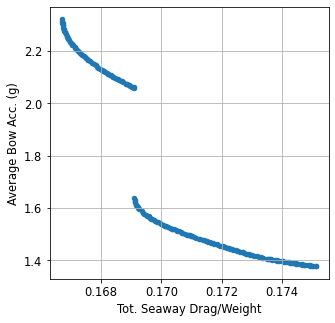

In [57]:
fig_1, axs_1 = plt.subplots(figsize=[5,5])
df.plot.scatter('Tot. Seaway Drag/Weight', 'Average Bow Acc. (g)', sharex=False, ax=axs_1);
axs_1.grid(True)
# fig_1.savefig('pareto.png')

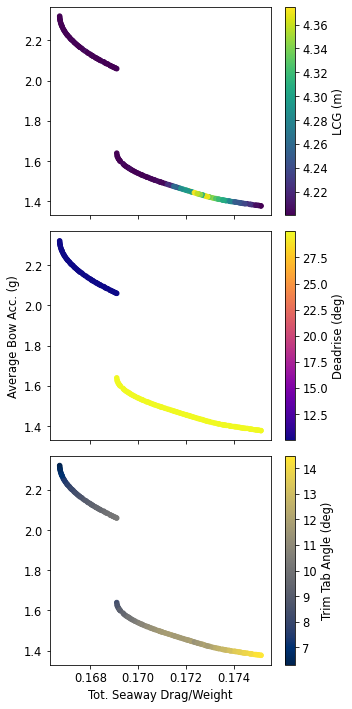

In [62]:
fig_2, axs_2 = plt.subplots(3, 1, figsize=[5,10])
df.plot.scatter('Tot. Seaway Drag/Weight', 'Average Bow Acc. (g)', c='LCG (m)', colormap='viridis', sharex=True, ax=axs_2[0]);
df.plot.scatter('Tot. Seaway Drag/Weight', 'Average Bow Acc. (g)', c='Deadrise (deg)', colormap='plasma', ax=axs_2[1]);
df.plot.scatter('Tot. Seaway Drag/Weight', 'Average Bow Acc. (g)', c='Trim Tab Angle (deg)', colormap='cividis', ax=axs_2[2]);
axs_2[0].set_ylabel(None);
axs_2[2].set_ylabel(None);
fig_2.tight_layout()
# fig_2.savefig('pareto_vars.png')

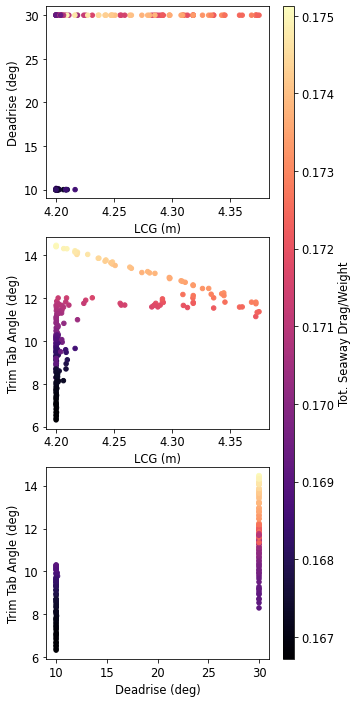

In [59]:
fig_3, axs_3 = plt.subplots(3, 1, figsize=[5,12])
color_values = 'Tot. Seaway Drag/Weight'
df.plot.scatter('LCG (m)', 'Deadrise (deg)', c=color_values, colormap='magma', sharex=False, ax=axs_3[0], colorbar=False);
df.plot.scatter('LCG (m)', 'Trim Tab Angle (deg)', c=color_values, colormap='magma', ax=axs_3[1], colorbar=False);
df.plot.scatter('Deadrise (deg)', 'Trim Tab Angle (deg)', c=color_values, colormap='magma', ax=axs_3[2], colorbar=False);
im = plt.gca().get_children()[0]
cbar = fig_3.colorbar(im, ax=axs_3.ravel().tolist(), aspect=60)
cbar.set_label(color_values)
# fig_3.savefig('vars.png')